## 基本信息

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

In [2]:
# path to where the data lies
#dpath = './data/'
train_data = pd.read_csv("train.csv")
train_data.head()

,x,y,2.1G(10),2.1G(11),2.1G(12),2.1G(4),2.1G(7),2.1G(8),3.5G(10),3.5G(11),3.5G(12),3.5G(4),3.5G(7),3.5G(8)
0,0,89,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23
1,0,90,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-123.19,-126.23,-126.23
2,0,91,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-124.05,-126.23,-126.23
3,0,92,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-124.92,-126.23,-126.23
4,0,93,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-125.77,-126.23,-126.23


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25811 entries, 0 to 25810
Data columns (total 14 columns):
x            25811 non-null int64
 y           25811 non-null int64
 2.1G(10)    25811 non-null float64
 2.1G(11)    25811 non-null float64
 2.1G(12)    25811 non-null float64
 2.1G(4)     25811 non-null float64
 2.1G(7)     25811 non-null float64
 2.1G(8)     25811 non-null float64
 3.5G(10)    25811 non-null float64
 3.5G(11)    25811 non-null float64
 3.5G(12)    25811 non-null float64
 3.5G(4)     25811 non-null float64
 3.5G(7)     25811 non-null float64
 3.5G(8)     25811 non-null float64
dtypes: float64(12), int64(2)
memory usage: 2.8 MB


In [4]:
# 判断数据是否有空
train_data.isnull().sum()

x            0
 y           0
 2.1G(10)    0
 2.1G(11)    0
 2.1G(12)    0
 2.1G(4)     0
 2.1G(7)     0
 2.1G(8)     0
 3.5G(10)    0
 3.5G(11)    0
 3.5G(12)    0
 3.5G(4)     0
 3.5G(7)     0
 3.5G(8)     0
dtype: int64

In [5]:
## 各属性的统计特性
train_data.describe()

,x,y,2.1G(10),2.1G(11),2.1G(12),2.1G(4),2.1G(7),2.1G(8),3.5G(10),3.5G(11),3.5G(12),3.5G(4),3.5G(7),3.5G(8)
count,25811.000000,25811.00000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000,25811.000000
mean,163.681570,67.81752,-108.514127,-110.319527,-108.429769,-113.919070,-111.130266,-115.278602,-110.703393,-111.831349,-110.229334,-116.053418,-114.473973,-117.743432
std,98.400582,40.49610,22.781435,21.828645,20.995701,16.799755,17.442046,17.070073,21.891570,21.116508,20.403680,14.755977,16.940765,14.543601
min,0.000000,0.00000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000
25%,68.000000,35.00000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000
50%,181.000000,65.00000,-126.230000,-126.230000,-121.580000,-126.230000,-117.570000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000,-126.230000
75%,252.000000,99.00000,-85.190000,-90.545000,-91.030000,-103.830000,-97.320000,-107.935000,-90.715000,-96.420000,-94.310000,-106.910000,-101.755000,-112.515000
max,317.000000,156.00000,-54.140000,-54.320000,-54.160000,-67.390000,-67.410000,-67.430000,-53.700000,-53.710000,-53.690000,-74.830000,-68.550000,-74.790000


## 数据分布相关性探索

### 特征频率分布图

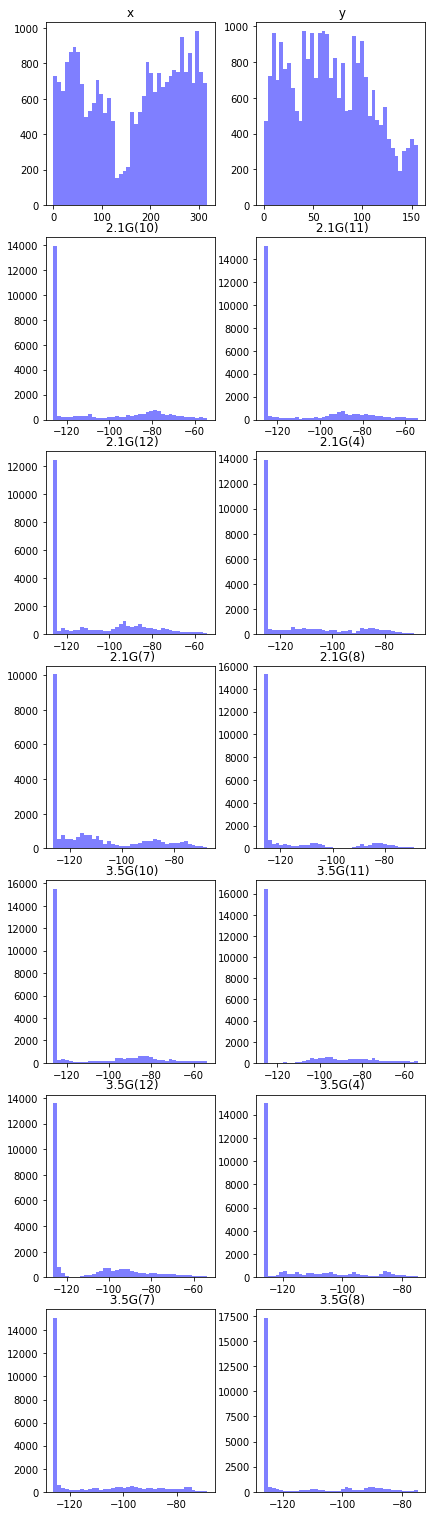

In [6]:
f, axes = plt.subplots(7,2,figsize=(6, 21))
f.tight_layout() 
for i,ax in enumerate(axes):
    for j,array in enumerate(ax):
        column = train_data.columns[i*2 + j]
        array.hist(train_data[column].values,bins=40, label=train_data[column], color='b', alpha=.5); 
        array.set_title(column) 

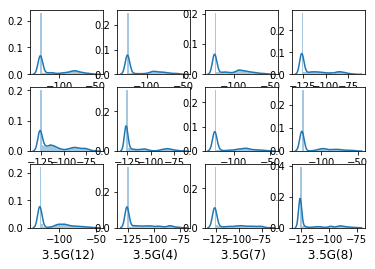

In [7]:
for i in range(12):
    column = train_data.columns[i + 2]
    plt.subplot(3,4,i+1)
    sns.distplot(train_data[column].values,bins=30, kde=True)
    plt.xlabel(column,fontsize = 12)

plt.show()
    

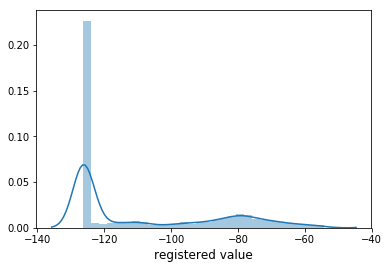

In [8]:
fig = plt.figure()
sns.distplot(train_data[' 2.1G(10)'].values, bins=30, kde=True)
plt.xlabel('registered value',fontsize = 12)
plt.show()

### 位置散点图

In [9]:
train_data.columns[1]

' y'

Text(0.5, 1.0, 'points')

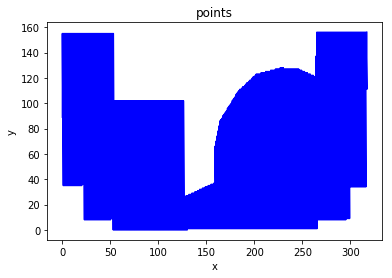

In [10]:
from pylab import *

x = train_data['x'].values
y = train_data[' y'].values

fig = plt.figure()
plt.plot(x, y, 'b')
xlabel('x')
ylabel('y')
title('points')

### 特征相关性

In [11]:
#get the names of all the columns
cols=train_data.columns
print(cols)

Index(['x', ' y', ' 2.1G(10)', ' 2.1G(11)', ' 2.1G(12)', ' 2.1G(4)',
       ' 2.1G(7)', ' 2.1G(8)', ' 3.5G(10)', ' 3.5G(11)', ' 3.5G(12)',
       ' 3.5G(4)', ' 3.5G(7)', ' 3.5G(8)'],
      dtype='object')


In [22]:
feature = train_data.copy()
del feature['x']
del feature[' y']
feature.head()

,2.1G(10),2.1G(11),2.1G(12),2.1G(4),2.1G(7),2.1G(8),3.5G(10),3.5G(11),3.5G(12),3.5G(4),3.5G(7),3.5G(8)
0,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23
1,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-123.19,-126.23,-126.23
2,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-124.05,-126.23,-126.23
3,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-124.92,-126.23,-126.23
4,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-126.23,-125.77,-126.23,-126.23


In [25]:
# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = feature.corr().abs()
data_corr[data_corr > 0.5]

,2.1G(10),2.1G(11),2.1G(12),2.1G(4),2.1G(7),2.1G(8),3.5G(10),3.5G(11),3.5G(12),3.5G(4),3.5G(7),3.5G(8)
2.1G(10),1.000000,0.923735,0.838523,NaN,NaN,NaN,0.966894,0.878056,0.773550,NaN,NaN,NaN
2.1G(11),0.923735,1.000000,0.758502,NaN,NaN,NaN,0.884960,0.949372,0.687935,NaN,NaN,NaN
2.1G(12),0.838523,0.758502,1.000000,NaN,NaN,NaN,0.785020,0.701619,0.944191,NaN,NaN,NaN
2.1G(4),NaN,NaN,NaN,1.000000,0.524756,0.873620,NaN,NaN,NaN,0.954777,NaN,0.833611
2.1G(7),NaN,NaN,NaN,0.524756,1.000000,0.637939,NaN,NaN,NaN,0.500391,0.918655,0.618772
2.1G(8),NaN,NaN,NaN,0.873620,0.637939,1.000000,NaN,NaN,NaN,0.820632,0.561609,0.961249
3.5G(10),0.966894,0.884960,0.785020,NaN,NaN,NaN,1.000000,0.889126,0.747001,NaN,NaN,NaN
3.5G(11),0.878056,0.949372,0.701619,NaN,NaN,NaN,0.889126,1.000000,0.664724,NaN,NaN,NaN
3.5G(12),0.773550,0.687935,0.944191,NaN,NaN,NaN,0.747001,0.664724,1.000000,NaN,NaN,NaN
3.5G(4),NaN,NaN,NaN,0.954777,0.500391,0.820632,NaN,NaN,NaN,1.000000,NaN,0.822648


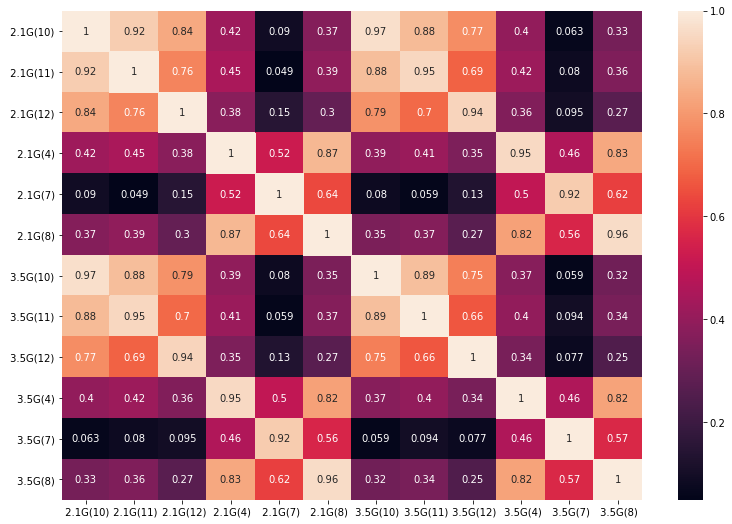

In [18]:
plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig('house_coor.png' )
plt.show()